# Title:-------

Specific expectations for the proposal:
Each group is expected to prepare a 1 page (max 500 words) written proposal that identifies the dataset they plan to work on, as well as the question they would like to answer using that dataset for their group project. The proposal should be done in a Jupyter notebook, and then submitted both as an .html file (File -> Download As -> HTML) and an .ipynb file that is reproducible (i.e. works and runs without any additional files.)

how do we know if the .ipynb file is reproducible? 

### Introduction: 

There are many different test prep classes out there and at varying prices. these test prep courses all claim to help improve students' marks. 

Predictive Question: Can we use the exam scores of students to predict whether or not they attended a test preparation course?

To determine if a student took a test prep course based off there marks from 3 exams we will use the data set `all_exams.csv`. The data set contains information about US high school students, and consists of the students gender, race/ethnicity, parental level of education, lunch, test preparation course attendance and  the students' marks for 3 exams in math, reading and writing. 

In the `making_dataset.ipynb` file
We increased the size of the sample by combining the files we downloaded because the data is generated spontaneously. We combined 3 data sets to get our data set that we will be working on with a sample size of 1200. We made a larger sample because it may result in higher accuracies, since our model will get to be familiar with more examples.

**things needed in the Introduction:**
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question

### Primary Exploratory Data Analysis:

**include:**

Demonstrate that the dataset can be read from the web into R 
Clean and wrangle your data into a tidy format
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [1]:
#read dataset from the wed 

In [2]:
#clean and wrangle data
#select for only exam marks and prep class

In [2]:
library(tidyverse)
options(repr.matrix.max.rows = 10)
all_exams<-read_csv("GP_data/all_exams.csv")
all_exams

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),


X1,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,male,group D,some college,standard,none,69,63,62
2,female,group E,bachelor's degree,free/reduced,completed,65,78,80
3,female,group C,some high school,standard,none,57,56,59
4,female,group D,associate's degree,free/reduced,none,62,73,71
5,male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1196,male,group C,associate's degree,standard,completed,65,63,62
1197,female,group C,some high school,standard,none,69,74,68
1198,female,group D,some college,free/reduced,none,43,48,45


The data looks tidy to other than fixing the column names so the spaces b/w wrods are _ instead. this will make maniputlating the data easier in future anaylsis. I did think we could do pivot longer and make a scores varible but the the obervation pre student would be spread out acorss 3 rows which not tidy. and should change all the chr data types to factors so it will be easier to work with in the futrue and don't have to worry about it later on. dbl data type of the scores is reasonable and we are going to remove X1 from the df b/c not usful so data type doesn't matter.

**if anyone else see something untidy fix it**

In [4]:
#expoloratory data analysis lets find out the number of student in each category of preparation course column 
#first we should change column names so that there ar _ instead of spaces so they are easier to use
#and we should remove the X1 column 
#we could look at what demographic of students attend the test prep (based on lunch or parent level eductation, gender?)
#look at students who did above average what there parents level of education is or see there lunch(If house hold can't 
#afford food that is stressful so may effect scores )


In [3]:
#to get the list of column names, easier to copy and past 
colnames(all_exams) 

[1] "X1"                          "gender"                     
[3] "race/ethnicity"              "parental level of education"
[5] "lunch"                       "test preparation course"    
[7] "math score"                  "reading score"              
[9] "writing score"

In [5]:
#first we should change column names so that there are _ instead of spaces so they are easier to work with
colnames(all_exams)<-c("X1", "gender", "race_ethnicity", "parental_level_of_education",
"lunch", "test_preparation_course", "math_score", "reading_score", "writing_score")
all_exams

X1,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,male,group D,some college,standard,none,69,63,62
2,female,group E,bachelor's degree,free/reduced,completed,65,78,80
3,female,group C,some high school,standard,none,57,56,59
4,female,group D,associate's degree,free/reduced,none,62,73,71
5,male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1196,male,group C,associate's degree,standard,completed,65,63,62
1197,female,group C,some high school,standard,none,69,74,68
1198,female,group D,some college,free/reduced,none,43,48,45


In [6]:
# remove the X1 column because it is not important 
#even though only care about the test_preparation_course, math_score, reading_score, writing_score for our question 
#keeping the other stuff incase we want to explore if they have any relationships

#need to change all the chr data types to fct types. this will make the easier to work with  
fct_exams<-select(all_exams, gender:writing_score)%>%
mutate(across(gender:test_preparation_course, as.factor))
fct_exams


gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
male,group D,some college,standard,none,69,63,62
female,group E,bachelor's degree,free/reduced,completed,65,78,80
female,group C,some high school,standard,none,57,56,59
female,group D,associate's degree,free/reduced,none,62,73,71
male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
male,group C,associate's degree,standard,completed,65,63,62
female,group C,some high school,standard,none,69,74,68
female,group D,some college,free/reduced,none,43,48,45


I don't know if we should remove anymore columns other than the X1 column because if we want a more accurate prediction we could use more predictor varibles and I don't want to limit our options 

`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,n
<fct>,<int>
completed,411
none,789


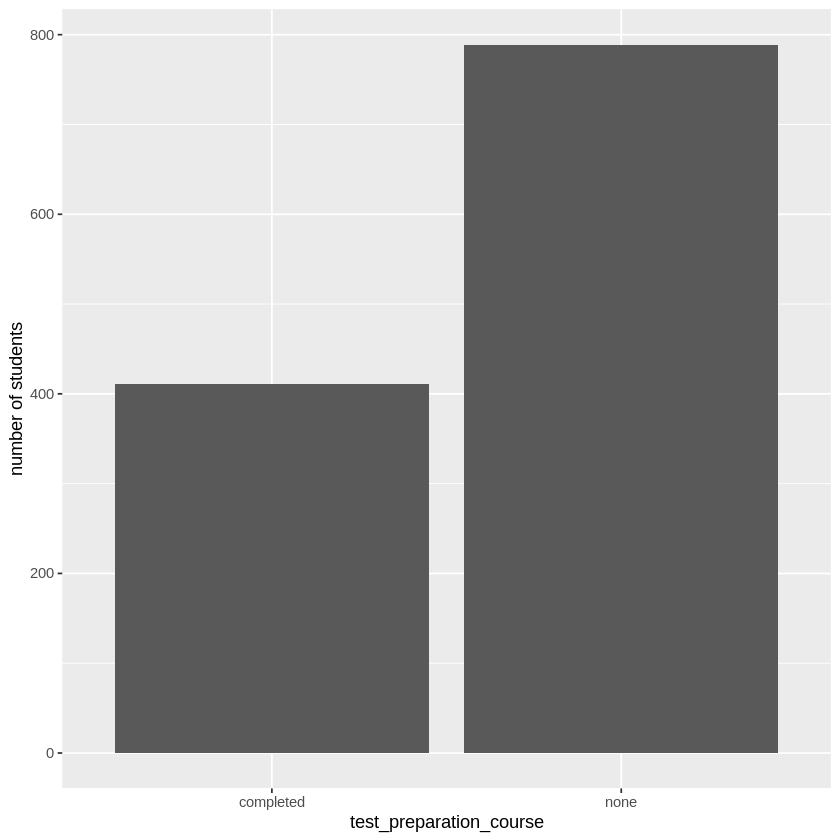

In [10]:
#do see the number of student in each category of test_preparation_course varible we can either group_by and summarize
#or we can visulize it with a bar graph 

prep_exam<-fct_exams%>%
group_by(test_preparation_course)%>%
summarize(n=n())
prep_exam

plot_prep<-fct_exams%>%
ggplot(aes(x=test_preparation_course))+
geom_bar()+
labs(x="test_preparation_course", y="number of students")
plot_prep

**overall there are more people who don't attend prep course which may effect our accuracy and prediction b/c there are less data on students who completed the prep course to train the model on so potenially less acurate prediction. (will this effect how the data is split???)**

In [11]:
#obervation: more people didn't go the go 
#lets find out what students went based off test score, number of students that got above average score attendence 

In [12]:
math_avg<-fct_exams%>%
summarize(math_avg=mean(math_score))
math_avg
write_avg<-fct_exams%>%
summarize(writing_avg=mean(writing_score))
write_avg
read_avg<-fct_exams%>%
summarize(reading_avg=mean(reading_score))
read_avg

math_avg
<dbl>
66.80833


writing_avg
<dbl>
68.24083


reading_avg
<dbl>
69.4425


the avg's for the exams are quit similar
**could make line on histogram indicating mean**

In [27]:
#average math socre of non and attend to compare overall mean 
prep_math<-fct_exams%>%
group_by(test_preparation_course)%>%
summarize(pre_mean=mean(math_score))
prep_math

#number of students that got above average score on writing attendence
above_wavg<-fct_exams%>%
filter(68.24083<writing_score)
#above_wavg

prep_write<-fct_exams%>%
group_by(test_preparation_course)%>%
summarize(n=n())
#prep_write



prep_read<-fct_exams%>%
group_by(test_preparation_course)%>%
summarize(n=n())
#prep_read



`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,pre_mean
<fct>,<dbl>
completed,70.59854
none,64.83397


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



from this we can see more students who didn't attend got higher than average. but not taking into acount if the same student got above average on multiple exams effect on attendance #filter for that next#. 

detrimine in any rows are missing data 

In [16]:
#find out how attendance effect average of each student 
overall_exam<-fct_exams%>%
rowwise(math_score:writing_score)%>%
mutate(overall_score=mean(math_score:writing_score))
overall_exam

gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
male,group D,some college,standard,none,69,63,62,65.5
female,group E,bachelor's degree,free/reduced,completed,65,78,80,72.5
female,group C,some high school,standard,none,57,56,59,58.0
female,group D,associate's degree,free/reduced,none,62,73,71,66.5
male,group C,some college,free/reduced,none,46,52,46,46.0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
male,group C,associate's degree,standard,completed,65,63,62,63.5
female,group C,some high school,standard,none,69,74,68,68.5
female,group D,some college,free/reduced,none,43,48,45,44.0


In [24]:
avg_overall<-overall_exam%>%
group_by(test_preparation_course)%>%
summarize(avg_overall=mean(overall_score))
avg_overall

#using map to check my work, and both have the corect number of row (# of rows is same as the count for prep course categories )
map_cplt<-overall_exam%>%
filter(test_preparation_course=="completed")%>%
select(overall_score)%>%
map_df(mean)
#map_cplt

map_none<-overall_exam%>%
filter(test_preparation_course=="none")%>%
select(overall_score)%>%
map_df(mean)
#map_none


`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,avg_overall
<fct>,<dbl>
completed,72.78102
none,64.78644


Adding missing grouping variables: `math_score`, `reading_score`, `writing_score`

Adding missing grouping variables: `math_score`, `reading_score`, `writing_score`



The overall average grade of students who completed to test preparation course is higher than the overall average grade of students who didn't attend the  test preparation course. roughly 35% of students completed to test prep course. This suggest that attending the test preparation course may lead to higher average compared to if you didn't attend. If we wanted to comfirm this inquiry we could collect more data about the same students and see how their grades change if they didn't attend this class but attend a class in the future or vis versa.

### Methods:

**include:**
Explain how you will conduct either your data analysis and which variables/columns you will use. 
Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results


**Come back too**
 Describe at least one way that you will visualize the results:
vertical line in histograme based where new obervation is to see where they land in the ogrinals data set telling where is histogram new obervation sould cause impact. 500 student 75 in reading now 501 student 75 in reading 


put line in mean and each subplot 

In [18]:
#do we need to scale and center our data even though there is no units 
#need to figure out the visual plot to do what will the varibles be
#if we want to use all 3 exam score varibles how will be plot that? we could make give comdine all 3 column to score 
#and on graph use different shapes for different exam type and diff colors for test prep attenance but so score would be 
#x axis but what would we make the y axis?
#or we could do "Base off the exam scores for writing and math can you determine if a student attended a prep course?"
#but look up how to do classification with more than two varibles (b/c it would be more acuarte b/c we don't know if the 
#course spent more time on a specific exam or not which could effect the accuracy


#when finding the k are we going to find seperate ones for each exam, like if k=3 will be find the 3 closest math_scores
#to the new obervations math_score and find the 3 closest reading_scores to the new obervations reading_score
#but still how would we graph 3 varibles and what like x axis could be math_score and y axos could be reading_score but
#but what would we use for the writing_score? 
#I guess graph could be 3D but not ideal
#need to ask TA how to plot 3 varibles so we can find the distance b/w then the find our k's 

-Using 4 variables (math score, reading score, writing score, attendance at test prep course)
-Select for the the 4 variables
-Visualization?? (not sure how to plot all the variables)
Once we figure out the visualization, we can use K nearest neighbor to predict a new observation/test how well our model works.

### Expected outcomes and significance

**include:**
What do you expect to find?

What impact could such findings have?

What future questions could this lead to?

In [19]:
#Expect to find: 
-The prediction our model is making (whether or not a student attended the test prep course)
-Some kind of trend between high grades overall and attendance to the test prep course?
#maybe b/c of the results above showed that students who attended the course overall average was better. so if new
#obervation has higher overall average they might have completed the course
#Impact of the findings:
-Shows the effectiveness of the test prep course (does it improve scores or not?)
-Could also influence students attendance to the course

#Future questions:
-Does attending test prep courses have a significant impact on the performance of students when they are writing exams, or is self-studying a better method?
-How do other factors affect students attendance to the test prep course (ie if they have other tutoring services, that might make them less inclined to attend the test prep course) 


ERROR: Error in parse(text = x, srcfile = src): <text>:2:6: unexpected symbol
1: #Expect to find: 
2: -The prediction
        ^
